In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.display import display, HTML

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/u-s-co2-emissions/emissions.csv


**This dataset contains carbon dioxide emissions data for various U.S. states from 1970 onwards. The data is broken down by state, sector (residential, commercial, transportation, electric power, and industrial), and fuel type (coal, petroleum, natural gas, and all fuels combined). The emissions values are measured in million metric tons of carbon dioxide.**

In [2]:
df = pd.read_csv("/kaggle/input/u-s-co2-emissions/emissions.csv")
df.head()

,year,state-name,sector-name,fuel-name,value
0,1970,Alabama,Industrial carbon dioxide emissions,Coal,26.721507
1,1970,Alabama,Industrial carbon dioxide emissions,Petroleum,3.577779
2,1970,Alabama,Industrial carbon dioxide emissions,Natural Gas,8.944097
3,1970,Alabama,Industrial carbon dioxide emissions,All Fuels,39.243383
4,1970,Alabama,Total carbon dioxide emissions from all sectors,All Fuels,102.646851


In [3]:
df.tail()

,year,state-name,sector-name,fuel-name,value
59896,2021,Wyoming,Commercial carbon dioxide emissions,Coal,0.012374
59897,2021,Wyoming,Residential carbon dioxide emissions,All Fuels,0.937989
59898,2021,Wyoming,Residential carbon dioxide emissions,Natural Gas,0.717777
59899,2021,Wyoming,Residential carbon dioxide emissions,Petroleum,0.220212
59900,2021,Wyoming,Total carbon dioxide emissions from all sectors,Petroleum,10.198574


In [4]:
df.shape, df.columns

((59901, 5),
 Index(['year', 'state-name', 'sector-name', 'fuel-name', 'value'], dtype='object'))

In [5]:
df.describe()

,year,value
count,59901.000000,59901.000000
mean,1995.101067,35.647050
std,14.922049,207.883289
min,1970.000000,0.000022
25%,1982.000000,0.793179
50%,1995.000000,4.197628
75%,2008.000000,19.413459
max,2021.000000,5996.429314


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59901 entries, 0 to 59900
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         59901 non-null  int64  
 1   state-name   59901 non-null  object 
 2   sector-name  59901 non-null  object 
 3   fuel-name    59901 non-null  object 
 4   value        59901 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.3+ MB


In [7]:
df.isnull().sum()

year           0
state-name     0
sector-name    0
fuel-name      0
value          0
dtype: int64

**How has CO2 emissions changed over the years in different states?**

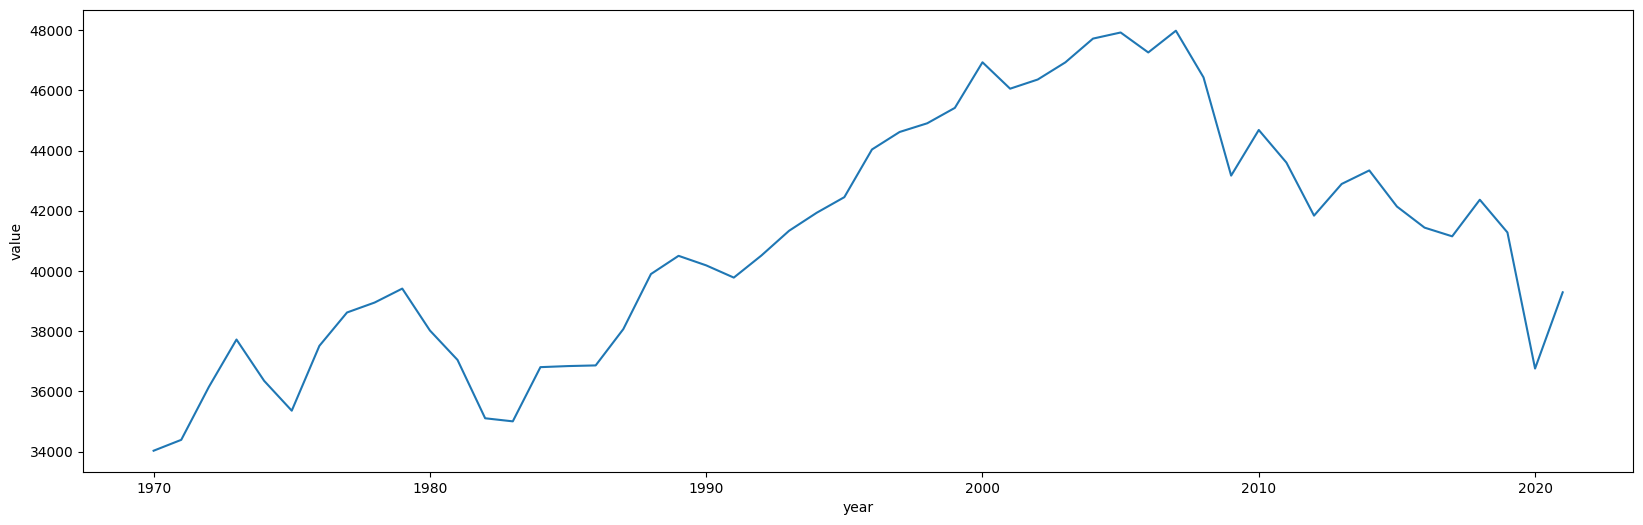

In [8]:
trend = df.groupby("year")
val = trend["value"].sum()
fig, axes = plt.subplots(figsize=(20, 6))
sns.lineplot(x=val.index, y=val, ax=axes)
plt.show()

In [9]:
df.groupby('state-name')['value'].value_counts()

state-name  value    
Alabama     0.049455     2
            1.368041     2
            0.000095     1
            0.000190     1
            0.000382     1
                        ..
Wyoming     65.928877    1
            66.749146    1
            66.823717    1
            67.238401    1
            68.948689    1
Name: count, Length: 59157, dtype: int64

In [10]:
alabama_1970 = df[(df['state-name'] == 'Alabama') & (df['year'] == 1970) & (df['fuel-name'] == 'All Fuels')]
sectors = alabama_1970['sector-name'].str.replace(' carbon dioxide emissions', '')
emissions = alabama_1970['value']
print(emissions)

3      39.243383
4     102.646851
11      4.336656
15      2.934710
19     18.787545
23     37.344556
Name: value, dtype: float64


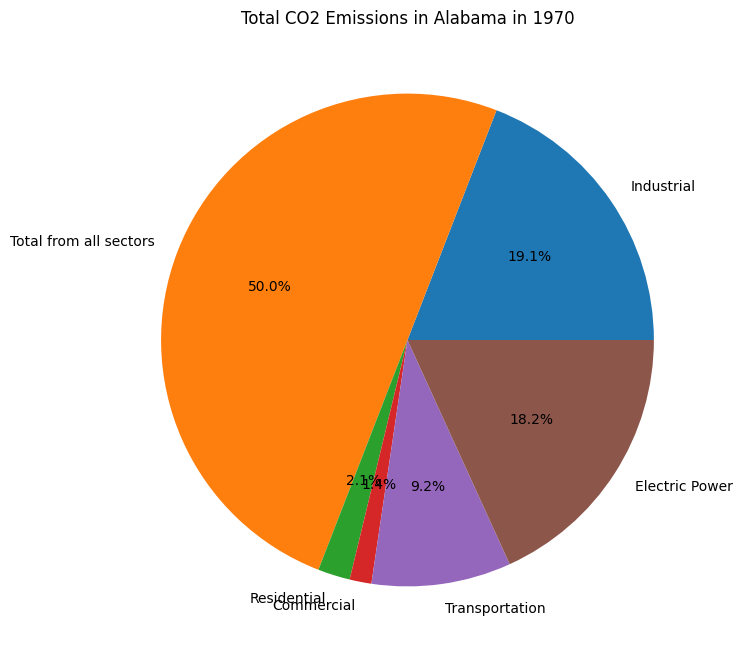

In [11]:
plt.figure(figsize=(8, 8))
plt.pie(emissions, labels=sectors, autopct='%1.1f%%')
plt.title('Total CO2 Emissions in Alabama in 1970')
plt.show()

58824      2.050755
58827      2.332216
58830     37.164374
58834     47.204182
58838     19.640576
58839    108.392103
Name: value, dtype: float64


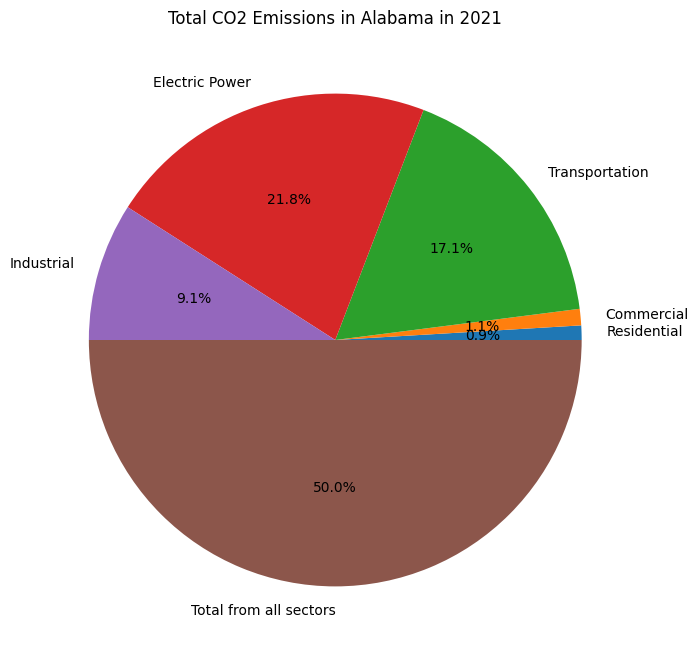

In [12]:
alabama_2021 = df[(df['state-name'] == 'Alabama') & (df['year'] == 2021) & (df['fuel-name'] == 'All Fuels')]
sectors = alabama_2021['sector-name'].str.replace(' carbon dioxide emissions', '')
emissions = alabama_2021['value']
print(emissions)
plt.figure(figsize=(8, 8))
plt.pie(emissions, labels=sectors, autopct='%1.1f%%')
plt.title('Total CO2 Emissions in Alabama in 2021')
plt.show()

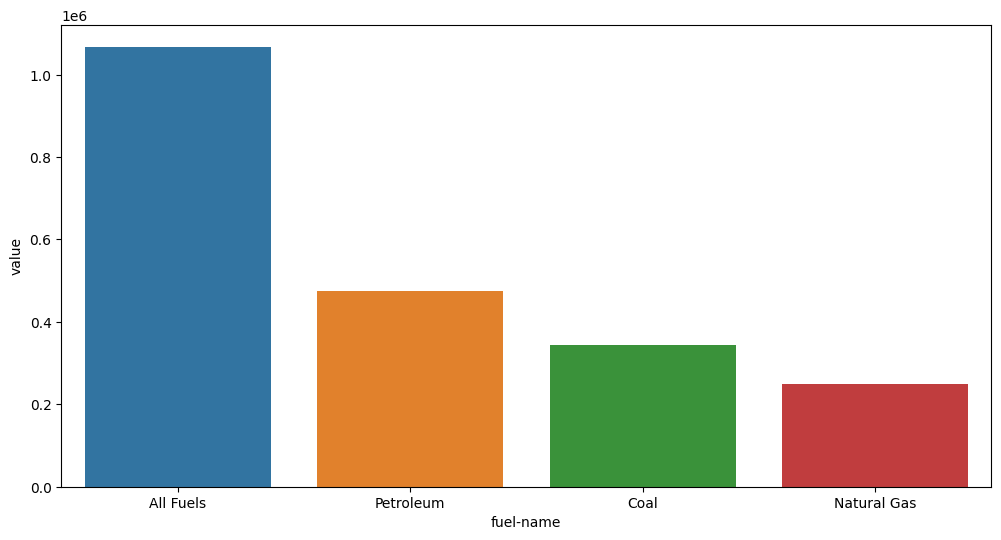

In [13]:
trend = df.groupby("fuel-name")
val = trend["value"].sum()
val = pd.DataFrame(val)
val = val.sort_values("value", ascending=False)
fig, axes = plt.subplots(figsize=(12, 6))
sns.barplot(x=val.index, y=val.iloc[:, 0], ax=axes)
plt.show()

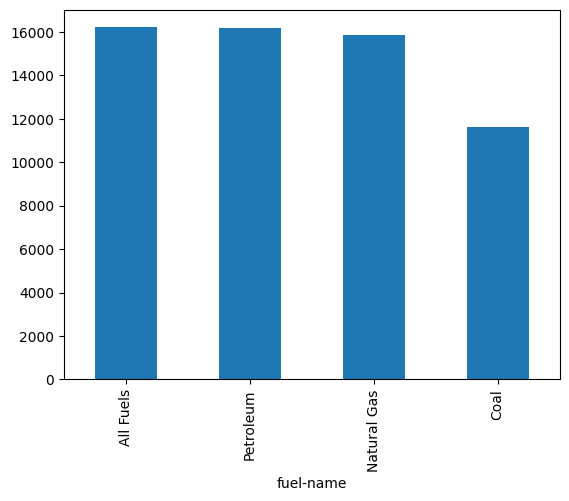

In [14]:
fuel_count = df['fuel-name'].value_counts().plot.bar()
